Make subplots of maps at a given depth in ASE for difference, warm, and cool composites. 
For oceTAUX/Y or u/vwind, it plots magntiude in colors and direction in quivers.

Designed for retrieving the 5th year of data from the warmest runs and coolest runs as defined in Datasets.py.
Any time period for any number of months may be selected.
Option to plot the time-mean for the warms, the cools, and the difference between the two. 

In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import Functions_load_output as flo
import Functions_data_analysis as fda
import Functions_plotting as fp
from Datasets import runs_ic_1995_warm_order, runs_ic_2001_warm_order, runs_ic_2008_warm_order

In [2]:
# Use importlib to reload modules after editing them
import importlib
importlib.reload(fp)

<module 'Functions_plotting' from '/glade/campaign/univ/ulnl0002/Gemma/Analysis/Functions_plotting.py'>

In [3]:
# Set region to plot from plot_regions dict in fda
region = 'AS_near' #AS_far, AS_long

#oceTAU plots oceTAUX and TAUY as vectors with surface temps as colored contours. 
# All other vnames in state_2d_set2 are accepted (and plotted as colors with no contours). See fda for vnames.
# vname = 'oceTAU' 
vname = 'wind'
# vname = 'EXFtaux'
# vname = 'SIarea'
# vname = 'SIheff'

# prefix = 'state_2d_set2'
prefix = 'EXF_forcing_set2'

# Select time period over which to average the velocities 
# 0 means February of 1st year
# ** idx 46 and 12 months averages over the 5th year D of 4th yr - N of 5th yr (do this for calculating seasonal means) ** 
# ** idex 47 and 12 averages 5th year J - D
# ** start in 46 for getting first DJF season, n_months=3 **
month_start_idx = 46
n_months = 12
str_time = 'annual_mean'
# str_time = 'DJF' #'DJF' #For title and filename


In [13]:
# assign warm runs and cool runs
runs = runs_ic_1995_warm_order
warm_runs = runs[0:4]
cool_runs = runs[-6:-2]
print('Warm runs:\n',warm_runs,'\nCool runs:\n', cool_runs)

Warm runs:
 ['run_forc_erai_1982_rep_ic_1995', 'run_forc_erai_1984_rep_ic_1995', 'run_forc_erai_1989_rep_ic_1995', 'run_forc_erai_1992_rep_ic_1995'] 
Cool runs:
 ['run_forc_erai_1994_rep_ic_1995', 'run_forc_erai_2003_rep_ic_1995', 'run_forc_erai_2009_rep_ic_1995', 'run_forc_erai_2011_rep_ic_1995']


In [14]:
# Get data
importlib.reload(fda)

if vname == 'oceTAU' or vname == 'wind':
    x_name_dict = {'oceTAU':'oceTAUX','wind':'uwind'}
    y_name_dict = {'oceTAU':'oceTAUY','wind':'vwind'}
    warm_X_list, cool_X_list, diff_X_list = fda.load_composite_data(x_name_dict[vname], [region], warm_runs, cool_runs, 
                                                          prefix, month_start_idx, n_months)
    warm_Y_list, cool_Y_list, diff_Y_list = fda.load_composite_data(y_name_dict[vname], [region], warm_runs, cool_runs, 
                                                          prefix, month_start_idx, n_months)

else:
    warm_data_list, cool_data_list, diff_data_list = fda.load_composite_data(vname, [region], warm_runs, cool_runs, 
                                                                             prefix, month_start_idx, n_months)

AS_near
Getting T data for all runs...
0
saving date from these times for 1st run:
 [cftime.DatetimeNoLeap(1998, 12, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 1, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 2, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 3, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 4, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 5, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 6, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 7, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 8, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 9, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 10, 1, 0, 0, 0, 0, has_year_zero=True)
 cftime.DatetimeNoLeap(1999, 11, 1, 0, 0, 0, 0, has_year_zero=True)]
(12, 254, 300)
lat shape, data lat shape: 254 254
lon shape, data lon shape: 300 300
1
(12, 254, 300)
2
(12,

Saving figure as Plots/Maps/Figure_Composite_diff_wind_annual_mean.png


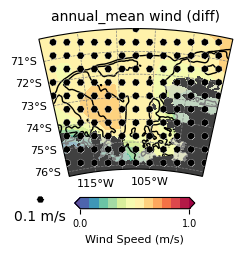

In [78]:
importlib.reload(fp)

#Use either warm or diff for plotting. 
plot_data = 'diff'

#---------------------------

levs_dict = {'T': np.linspace(-2, 2, 27), 'oceTAU': np.linspace(-2, 2, 27),
                  'wind': np.linspace(0, 7, 13), 'SIarea': np.linspace(0, 1, 15),
                  'SIheff': np.linspace(0, 3, 15)}
diff_levs_dict = {'T': np.linspace(-2, 2, 27), 'oceTAU': np.linspace(-2, 2, 27),
                  'wind': np.linspace(0, 1, 13),
                  'SIarea': np.linspace(-0.2, 0.2, 15),
                  'SIheff': np.linspace(-1, 1, 15)}
cmap_dict = {'T': 'Spectral_r', 'oceTAU': 'Spectral_r', 'wind': 'Spectral_r',
             'SIarea': 'BuPu', 'SIheff': 'PuRd'}
cmap_diff_dict = {'T': 'Spectral_r', 'oceTAU': 'Spectral_r', 'wind': 'Spectral_r',
                  'SIarea': 'BRGn_r', 'SIheff': 'PiYG_r'}

if plot_data == 'warm':
    data = warm_data_list[0]
    if vname == 'oceTAU' or vname == 'wind':
        data_x = warm_X_list[0]
        data_y = warm_Y_list[0]
    else:
        data_x, data_y = None, None
    fig_name = 'Plots/Maps/Figure_Composite_'+plot_data+'_'+vname+'_'+str_time+'.png'
    levs = levs_dict[vname]
    cmap = cmap_dict[vname]
    mask_dict = {'wind':2}
    vec_len_dict = {'wind':5}

elif plot_data == 'cool':
    data = cool_data_list[0]
    if vname == 'oceTAU' or vname == 'wind':
        data_x = cool_X_list[0]
        data_y = cool_Y_list[0]
    else:
        data_x, data_y = None, None
    fig_name = 'Plots/Maps/Figure_Composite_'+plot_data+'_'+vname+'_'+str_time+'.png'
    levs = levs_dict[vname]
    cmap = cmap_dict[vname]
    mask_dict = {'wind':2}
    vec_len_dict = {'wind':5}

elif plot_data == 'diff':
    data = diff_data_list[0]
    if vname == 'oceTAU' or vname == 'wind':
        data_x = diff_X_list[0]#[0:-1,:]
        data_y = diff_Y_list[0]
    else:
        data_x, data_y = None, None
    fig_name = 'Plots/Maps/Figure_Composite_'+plot_data+'_'+vname+'_'+str_time+'.png'
    levs = diff_levs_dict[vname]
    cmap = cmap_diff_dict[vname]
    mask_dict = {'wind':0.01}
    vec_len_dict = {'wind':0.1}


#mask out small vals to avoid dots on quiver plot. 

mag = np.sqrt(data_x**2 + data_y**2)
mag_masked = mag.where(mag > mask_dict[vname])
# chosen based on min value of vectors: np.min(data_x**2+data_y**2). check for other vars and add to dict.
data_x_masked = data_x.where(mag > mask_dict[vname])
data_y_masked = data_y.where(mag > mask_dict[vname])


fp.make_contour_map(vname, mag, levs, cmap, region,
                    title=str_time+' '+vname+' ('+plot_data+')', save=fig_name,
                    data_x=data_x_masked, data_y=data_y_masked,vec_len=vec_len_dict[vname])


In [74]:
wind_vectors = np.sqrt(data_x**2+data_y**2)
vec_mean = np.mean(wind_vectors)
vec_std = np.std(wind_vectors)
vec_min = np.min(wind_vectors)
print(vec_mean, vec_std, vec_min)

pctle_10 = np.percentile(wind_vectors.values.flatten(), 10)
print('10th percentile value:',pctle_10)

<xarray.DataArray ()>
array(0.45140352) <xarray.DataArray ()>
array(0.12634588) <xarray.DataArray ()>
array(0.12717178)
10th percentile value: 0.24185149350257973


(array([0.32322266, 0.47678858, 0.3273365 , 0.16413691, 0.1318511 ,
        0.12674786, 0.12044692, 0.11362524, 0.1083137 , 0.10581415,
        0.10268972, 0.09711781, 0.09342057, 0.09493071, 0.10071091,
        0.10581415, 0.11018836, 0.11497916, 0.1976725 , 0.25938007,
        0.1095114 , 0.09347264, 0.0881611 , 0.09321227, 0.07274723,
        0.05155316, 0.03796187, 0.03499366, 0.05259463, 0.0586352 ]),
 array([0.08929939, 0.34131357, 0.59332774, 0.84534192, 1.0973561 ,
        1.34937027, 1.60138445, 1.85339863, 2.1054128 , 2.35742698,
        2.60944116, 2.86145533, 3.11346951, 3.36548369, 3.61749786,
        3.86951204, 4.12152622, 4.37354039, 4.62555457, 4.87756875,
        5.12958292, 5.3815971 , 5.63361128, 5.88562546, 6.13763963,
        6.38965381, 6.64166799, 6.89368216, 7.14569634, 7.39771052,
        7.64972469]),
 <BarContainer object of 30 artists>)

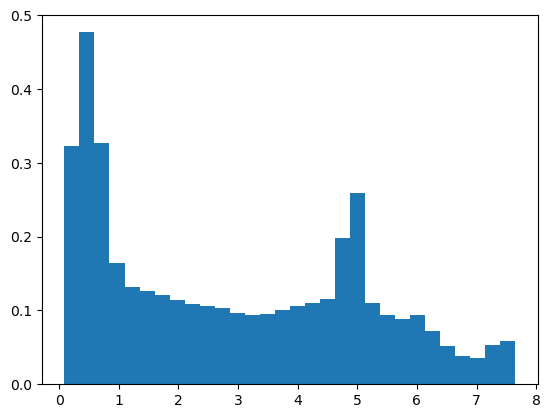

In [34]:
wind_vectors = np.sqrt(data_x**2+data_y**2)
wind_flat = wind_vectors.values.flatten()
plt.hist(wind_flat,bins=30,density=True)


In [6]:
 # Break down into seasons (WIP)
seasons = ['DJF','MAM','JJA','SON']
seasonal_means = []
for i in range(len(seasons)):
    pass


In [7]:
# If you want to plot control run
plot_control = False

if plot_control:
    # Load T data (each item in list will have length n_regions, containining xr data arrays with shape (n_depth, n_lats)

    # Get warm data
    prefix = 'state_3d_set2'
    # ens_T has shape n_runs, n_months,n_lats,n_lons
    control_ds = flo.load_experiment_ds('control', 'all', prefix)
    control_T = control_ds['THETA']
    control_T = control_T.sel(depth = depth, method='nearest')
    lat1,lat2,lon1,lon2, = fda.plot_regions[region]
    control_T = control_T.sel(lat = slice(lat1,lat2),lon=slice(lon1,lon2))
    # Average over times
    ctrl_mean_T = np.mean(control_T,axis=0)

    # convert to simpler xr data array for easy plotting
    # actually I don't think this helps at all
    ctrl_mean_T_da = xr.DataArray(data = ctrl_mean_T, dims = ['lat','lon'],\
                                coords = dict(lat=ctrl_mean_T.lat.values,\
                                                lon=ctrl_mean_T.lon.values))

    # Takes several mins to plot control run for some reason
    # Plot maps with differences, warm, cool as columns
    T_levs = np.linspace(-2,2,49)
    fp.make_contour_map('THETA', ctrl_mean_T_da, T_levs, 'RdBu_r',region,title='Control run mean',save=None)


In [8]:
prefix = 'state_3d_set2'
# ens_T has shape n_runs, n_months,n_lats,n_lons
control_ds = flo.load_experiment_ds('control', 'all', prefix)
control_T = control_ds['THETA']
control_T = control_T.sel(depth=0,method='nearest')
control_T

<xarray.DataArray 'THETA' (time: 312, lat: 416, lon: 896)>
dask.array<getitem, shape=(312, 416, 896), dtype=float32, chunksize=(1, 416, 896), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) >f4 -65.34 -65.38 -65.41 -65.45 ... -76.46 -76.48 -76.5
  * lon      (lon) >f4 -140.0 -139.9 -139.8 -139.7 ... -65.54 -65.46 -65.38
    depth    >f4 -5.0
    rA       (lon, lat) >f4 dask.array<chunksize=(896, 416), meta=np.ndarray>
    Depth    (lon, lat) >f4 dask.array<chunksize=(896, 416), meta=np.ndarray>
    drF      >f4 dask.array<chunksize=(), meta=np.ndarray>
    PHrefC   >f4 dask.array<chunksize=(), meta=np.ndarray>
    hFacC    (lon, lat) >f4 dask.array<chunksize=(896, 416), meta=np.ndarray>
    maskC    (lon, lat) bool dask.array<chunksize=(896, 416), meta=np.ndarray>
    rhoRef   >f4 dask.array<chunksize=(), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) object 1992-02-01 00:00:00 ... 2018-01-01 00:00:00
Attributes:
    standard_name:  THETA
    long_name:      Potential Temperature
    units:          degC

In [9]:
# For testing
testing = False
if testing:
    from matplotlib import pyplot as plt
    import matplotlib.path as mpath
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from matplotlib import colors

In [10]:
if testing:
    
    data_2d = data_x
    levs = np.linspace(-0.1,0.1,11)
    cmap = 'PuOr_r'

    # Set up plot
    lons, lats = data_x.lon.values,data_x.lat.values
    lat1,lat2,lon1,lon2 = fda.plot_regions[region]
    lon_mid = (lon1+lon2)/2
    grid_proj = ccrs.PlateCarree()

    fig = plt.figure()
    fig.set_size_inches((10,8))
    ax = fig.add_subplot(1,1,1,projection=ccrs.SouthPolarStereo(central_longitude=lon_mid)) #eentral_lon =-100 rotates antarctica so pacific is up

    data_2d_ma = data_2d.where(data_2d != 0)
    cf_em = ax.contourf(lons, lats, data_2d_ma,transform=grid_proj,\
                             levels=levs, cmap=cmap, zorder=0, extend = 'both')

    land_ice_ds = flo.get_bathymetry_and_troughs()
    land_ice_ds = land_ice_ds.sel(lat=slice(lat1,lat2),lon=slice(lon1,lon2))
    lon_ice,lat_ice = land_ice_ds.lon, land_ice_ds.lat
    blevs = (500,1000)

    # Plot bathymetry and ice
    ax.contour(lon_ice,lat_ice,land_ice_ds.bathy,blevs,colors='k',transform=grid_proj,linewidths=0.5,zorder=1)
    # Plot shelf break in thicker line
    ax.contour(lon_ice,lat_ice,land_ice_ds.bathy,(1000,),colors='k',transform=grid_proj,linewidths=1,zorder=1)
    ax.contourf(lon_ice,lat_ice,land_ice_ds.all_ice,transform=grid_proj,colors=['lightgray']*2,alpha=0.6,zorder=2)
    ax.contourf(lon_ice,lat_ice,land_ice_ds.grounded_ice,transform=grid_proj,cmap='binary_r',zorder=2)

    # mask really small values to clean up quivers
    x_ma = data_x.where(data_x != 0)
    y_ma = data_y.where(data_y != 0)
    ax.quiver(lons, lats, x_ma.values, y_ma.values,transform = grid_proj,\
              regrid_shape=35,pivot='middle',scale=1.5)#, width=0.0045, scale = 0.14)
